# <center><h3>Statistical Hypothesis Testing - Golf Ball</h3></center>

## Problem Statement
Par, Inc., is a major manufacturer of golf equipment. Management believes that Par's market share could be increased with the introduction of a cut-resistant. longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.<br/>
One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the two models only.

Prepare a Managerial report
  1. Provide descriptive statistical summaries of the data for each model.
  2. Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.
  3. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
  4. What is the 95% confidence interval for the populaion mean of each model. And what is the 95% confidence interval for the difference between the means of the two population?
  5. Do you see a need for larger sample sizes and more testing with the golf balls? Discuss

### Dataset
The dataset **(SM4-Golf.xls)** includes the results of all the 40 tests, with distances measured to the nearest yard. **Current** column represents the distance travelled by the balls currently Par is been using and the **New** column is for the management proposed new cut-resistant balls.

---

## Imports and Configuration
Import all the libraries needed to load, visualize the dataset and run the hypothesis testing

In [1]:
# Numerical calculation
import numpy as np
# Data handling
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical functions
import statistics as st
from scipy.stats import norm, t, skew, kurtosis, shapiro, levene, ttest_ind
from statsmodels.api import qqplot
from statsmodels.stats.api import CompareMeans, DescrStatsW
from statsmodels.stats.power import ttest_power, TTestIndPower

In [2]:
# Configure for any of the default setting of any library
%matplotlib inline
sns.set_style('whitegrid')

**Comments**
>- **``%matplotlib inline``** sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline without needing to call plt.show() every time a data is plotted.
>- Set Seaborn's asthetic parameter

## Load the Dataset

In [3]:
# Load the dataset into a Pandas dataframe and save it in a varible called balls
balls = pd.read_excel('SM4-Golf.xls')
balls.T # Transpose for better vewing in this notebook

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Current,264,261,267,272,258,283,258,266,259,270,...,281,274,273,263,275,267,279,274,276,262
New,277,269,263,266,262,251,262,289,286,264,...,283,250,253,260,270,263,261,255,263,279


## Inspect the Dataset

In [4]:
# Get the shape and size of the dataset
balls.shape

(40, 2)

In [5]:
# Get more info on it
# 1. Name of the columns
# 2. Data Types of the columns
# 3. Look for any missing values
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [6]:
# Describe the dataset with various summary and statistics
balls.describe().T # Transpose for better vewing in this notebook

,count,mean,std,min,25%,50%,75%,max
Current,40.0,270.275,8.752985,255.0,263.0,270.0,275.25,289.0
New,40.0,267.500,9.896904,250.0,262.0,265.0,274.50,289.0


**Observations**
>- The dataset comprises of **2 columns** (Current and New) and **40 rows**
>- All the columns are of type integer
>- There are **No null/missing values** present in the dataset
>- These columns contain the distance travelled in yards by the current and new balls respectively when hit by a mechanical hitting machine
>- Both the samples have almost equal mean and median, hence they are normally distributed.
>- A low standard deviation along with the spread of min and max around the median suggests that there is **no outliers present** in any of the samples

---

## Q1. Provide descriptive statistical summaries of the data for each model.
Descriptive Statistics summary describes the basic features of the data in a study. The following two sets of properties fall under the Descriptive Statistics
  - Central tendency
  - Dispersion
  
### Central Tendency
It summaries the *mean, median* and *mode* of the driving distance of the sample.

- **mean()**: arithmetic average
- **median()**: middle item for odd length sample and avg. of two middle items for even length sample
- **mode()**: most occuring value in the dataset
- **harmonic_mean()**: Harmonic mean is a measure of the center
- **median_low()**: low median for even length sample
- **median_high()**: high median for even length sample
- **median_grouped()**: $50^{th}$ percentile or $Q_{2}$

In [7]:
# Separate the two samples and store them in 2 different variables
curr_balls = balls['Current']
new_balls = balls['New']

In [8]:
# Central tendency of current model
mode = 'No unique mode'
try:
    mode = st.mode(curr_balls)
except:
    pass
print('''Central tendency of current model:\nmean: {}\nmedian: {}\nmode: {}\nharmonic mean: {}
low median: {}\nhigh median: {}\ngrouped median: {}'''.format(
    st.mean(curr_balls), st.median(curr_balls), mode, st.harmonic_mean(curr_balls),
    st.median_low(curr_balls), st.median_high(curr_balls), st.median_grouped(curr_balls)))

Central tendency of current model:
mean: 270.275
median: 270.0
mode: No unique mode
harmonic mean: 270.00089450236504
low median: 270
high median: 270
grouped median: 270.0


In [9]:
# Central tendency of new model
mode = 'No unique mode'
try:
    mode = st.mode(new_balls)
except:
    pass
print('''Central tendency of new model:\nmean: {}\nmedian: {}\nmode: {}\nharmonic mean: {}
low median: {}\nhigh median: {}\ngrouped median: {}'''.format(
    st.mean(new_balls), st.median(new_balls), mode, st.harmonic_mean(new_balls),
    st.median_low(new_balls), st.median_high(new_balls), st.median_grouped(new_balls)))

Central tendency of new model:
mean: 267.5
median: 265.0
mode: No unique mode
harmonic mean: 267.1453401443853
low median: 264
high median: 266
grouped median: 265.5


### Dispersion
Dispersion/spread gives us an idea of how the data strays from the typical value.

- **variance()**: variance of the sample
- **stdev()**: standard deviation of the sample

In [10]:
# Dispersion of current model
print('Dispersion of current model:\nvariance: {}\nstandard deviation: {}'.format(
    st.variance(curr_balls), st.stdev(curr_balls)))

Dispersion of current model:
variance: 76.61474358974358
standard deviation: 8.752984838884595


In [11]:
# Dispersion of new model
print('Dispersion of new model:\nvariance: {}\nstandard deviation: {}'.format(
    st.variance(new_balls), st.stdev(new_balls)))

Dispersion of new model:
variance: 97.94871794871794
standard deviation: 9.896904462947894


## Visualize the Dataset

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


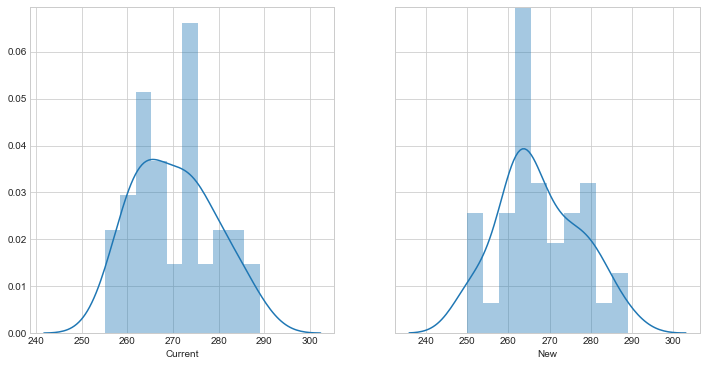

In [12]:
# Check the sample skewness and spread
f, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
sns.distplot(curr_balls, bins=10, ax=axes[0])
sns.distplot(new_balls, bins=10, ax=axes[1])

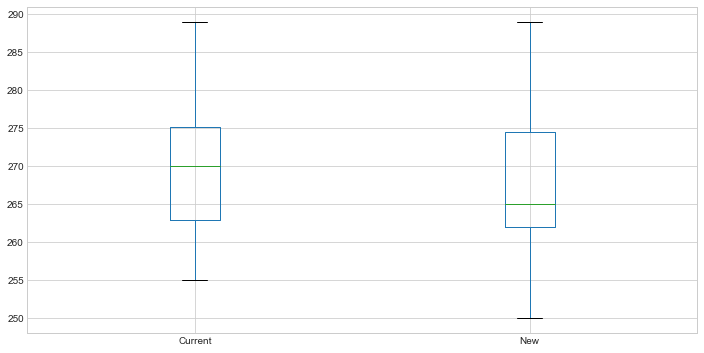

In [13]:
# Check for central tendency of each sample against one another
balls.boxplot(figsize=(12,6))

**Observations**
>- Looking at the above figures it is clear that both the samples are almost normally distributed. So we go ahead and prove it statistically.
>- The samples of new ball have more scattered observations than the samples of current ball. So is proved by a greater standard deviation of new ball samples.
>- But it is not evident from the boxplot to draw a concrete solution whether the two sample means are equal or different from each other.

---
Hence we go ahead and apply **inferential statistics** to derive the result.

## Q2. Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

## *Test of Normality*
Normality tests are used to determine whether the sample has a **``Gaussian Distribution``** and to compute how likely it is for a random variable in the dataset to be normally distributed. In Normal/Gaussian curve the data points are spread around the *mean/median* according to the standard deviation. Few statistical and non-statistical methods for normality check are

#### i) ``Histogram``
It's clear that most values are centered around zero - the mean and the median of the sample from the above histogram. But we can not imperically infer for the normality of the population from this.
     
  
#### ii) ``Skewness and Kurtosis``
SKEWNESS is usually described as the measure of dataset's symmetry around its mean, or more precisely, the lack of symmetry around its mean. A perfect symmetrical dataset has a skewness of 0. Hence ``Normal Distribution has a skewness of 0``. Karl Pearson's Coefficient of skewness is described as $$Skewness=\frac{3(\bar{X}-M_{d})}{\sigma}$$
     where
- $\bar{X}$ = Mean of the sample
- $M_{d}$ = Median of the sample
- $\sigma$ = Standard deviation

KURTOSIS is a measure of "tailedness" i.e. it is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. It is described as $$Kurtosis=\sum\frac{(X_{i}-\bar{X})^4}{n\sigma^4}$$
     where
 - $\bar{X}$ = Mean of the sample
 - $X_{i}$ = any value in the sample
 - $n$ = sample size
 - $\sigma$ = Standard deviation
 
``Kurtosis for a standard normal distribution is 3`` as per ``Pearson's definition``. But ``Fisher's definition`` subtracts 3 from the above equation and considers the ``kurtosis to be 0 for a normal distribution``.
     

In [14]:
# Print Skewness and Kurtosis for both the samples
print('Current ball has a \nSkewness of {} \nKurtosis of {} (Fischer\'s coeff) \nKurtosis of {} (Pearson\'s coeff)'
      .format(skew(curr_balls), kurtosis(curr_balls, fisher=True), kurtosis(curr_balls, fisher=False)))
print('New ball has a \nSkewness of {} \nKurtosis of {} (Fischer\'s coeff) \nKurtosis of {} (Pearson\'s coeff)'
      .format(skew(new_balls), kurtosis(new_balls, fisher=True), kurtosis(new_balls, fisher=False)))

Current ball has a 
Skewness of 0.29456628634379833 
Kurtosis of -0.8168840741950509 (Fischer's coeff) 
Kurtosis of 2.183115925804949 (Pearson's coeff)
New ball has a 
Skewness of 0.23072220761583526 
Kurtosis of -0.59881719251117 (Fischer's coeff) 
Kurtosis of 2.40118280748883 (Pearson's coeff)


**Observation**: The values for Skewness and Kurtosis are not emperically indicating whether the samples are drawn from a normal distribution or not.
     
#### iii) ``Q-Q Plot (Quantile-Quantile Plot)``
Q-Q Plot helps visualize the quantiles of two probability distributions against one another. It compares the quantiles of a given distribution against a standard normal distribution if dist parameter is not given.

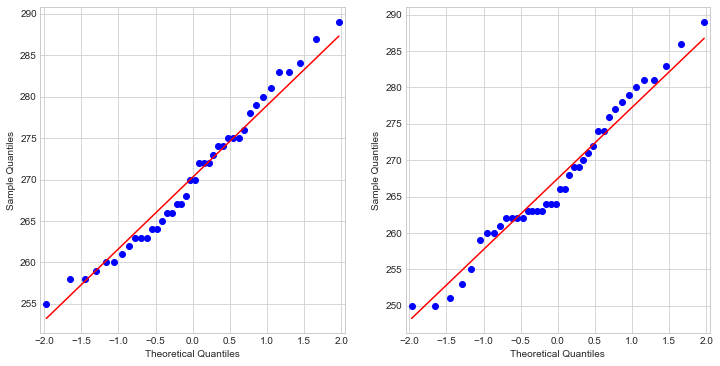

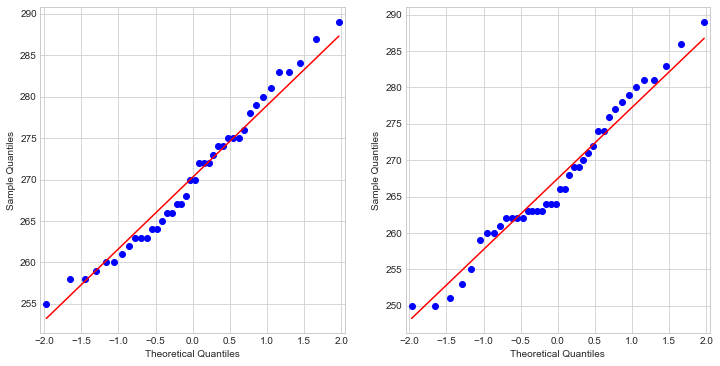

In [15]:
f, ax = plt.subplots(1,2,figsize=(12,6))
qqplot(curr_balls, line='s', ax=ax[0])
qqplot(new_balls, line='s', ax=ax[1])

**Observation**: The Q-Q Plot intends to visually represent that, both the samples follow the same distribution. They are roughly aligned along the red line which corresponds to a standard normal distribution.
   
#### iv) ``Shapiro-Wilk Test``
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is to be drawn from a Gaussian distribution. There are some underlaying assumptions. This function returns both the w-statistics calculated by the test and the p-value. Higher the w-stat indicates the sample is drawn from a normal distribution, which is described by the equation $$W=\frac{(\sum a_{i}x_{i})^2}{\sum(x_{i}-\bar{x})^2}$$
**Assumptions:**
   - Test is suitable for smaller sample of data i.e thousands of observations or fewer
   - Observations in each sample are independent i.e. samples are un-paired and are identically distributed.

**Formulate the Hypothesis:**<br/>
$H_{0}$: Sample is drawn from a normal population<br/>
$H_{a}$: Sample is NOT drawn from a normal population

*Note*: $\alpha=0.05$ (Industry standard)

In [16]:
# Test stat for current ball sample
w_stat, p_value = shapiro(curr_balls)
print('w-statistics: {}\np-value: {}'.format(w_stat, p_value))

w-statistics: 0.9707046747207642
p-value: 0.378787100315094


In [17]:
# Test stat for new ball sample
w_stat, p_value = shapiro(new_balls)
print('w-statistics: {}\np-value: {}'.format(w_stat, p_value))

w-statistics: 0.9678263664245605
p-value: 0.3064655363559723


**Observation**
>- Calculated w-statistics for both the samples tends to 1. 
>- Considering the industry standard significance level ($\alpha$) of 0.05, the calculated p-value for both the samples is greater than $\alpha$. Hence we reject the alternate hypothesis ($H_{a}$) and embrace the null hypothesis ($H_{0}$) which says *both the samples are drawn from a Normal Population.*

### *Test of Homogenity*
Test of Homogenity of variance is conducted to determine if two samples have equal variances or not which is one of the main assumptions in some other statistical tests. Levene's test is an alternative to the Bartlett test as it is less sensitive to departures from normality in other words outlietrs. So Levene test is preferred over Bartletts when the sample contains utliers.

#### i) ``Levene Test``
This function returns both the w-statistics calculated by the test and the p-value. The w-statistics can be formulated as
$$W=\frac{(N-k)}{(k-1)}\frac{\sum_{i=1}^k N_{i}(Z_{i.}-Z..)^3}{\sum_{i=1}^k \sum_{j=1}^{N_{i}}(Z_{ij}-Z_{j.})^2}$$
where
- $k$ is the number of different groups to which the sampled cases belong,
- $N_{i}$ is the number of cases in the $i^{th}$ group, 
- $N$ is the total number of cases in all groups,
- $Y_{ij}$ is the value of the measured variable for the $j^{th}$ case from the $i^{th}$ group,
- $Z_{ij} = \begin{cases}|Y_{ij}-{\bar {Y}}_{i\cdot }|,&{\bar {Y}}_{i\cdot }{\text{ is a mean of the }}i{\text{-th group}},\\|Y_{ij}-{\tilde {Y}}_{i\cdot }|,&{\tilde {Y}}_{i\cdot }{\text{ is a median of the }}i{\text{-th group}}.\end{cases}$

**Formulate the Hypothesis:**<br/>
$H_{0}: \sigma_{1}^2 = \sigma_{2}^2$ (Both the samples are homogenous in variances)<br/>
$H_{a}: \sigma_{1}^2 \neq \sigma_{2}^2$ (Both the samples are not homogenous in variances)

*Note*: $\alpha = 0.05$ (Industry Standard)

In [18]:
levene(curr_balls, new_balls)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

**Observation**
>- Considering the industry standard significance level ($\alpha$) of 0.05, the calculated p-value for this test is greater than $\alpha$. Hence we reject the alternate hypothesis ($H_{a}$) and embrace the null hypothesis ($H_{0}$) which says *Both the samples are homogenous in variances.*

***Note***: From the above tests of Normality and Homogenity, we conclude the original population is parametric and as we have two independent samples with us, we go ahead and apply **Two Sample parametric T-Test**

### *Two Sample Test*
As a thumb rule from ``Central Limit Theorom`` (CLT), Z-test is used for a larger sample size (n>30) with known population standard deviation and Student's T-test is used for a smaller sample size (n<30). However it is also rational to use T-test for even large samples, especially when the population standard deviation is unknown. Numerically, when sample size becomes more and more larger, t-statistic and z-statistic come closure to each other, or t distribution becomes close to normal distribution, and more important, the influence of the degrees of freedom on the shape of distribution gradually becomes null.

Considering the above statement we go ahead and apply Student's T-test for our case study.

#### i) ``Student's T-Test``
The independent samples t-test is a parametric test which compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. This function returns both the t-statistics calculated by the test and the p-value. The t-statistics is the ratio of *observed difference between sample means* to *standard error of the difference between the means* and it can be formulated as $$t=\frac{\bar{x}_{1}-\bar{x}_{2}}{S_{pooled}\sqrt{\frac{1}{n_{1}}+\frac{1}{n_{2}}}}$$

where $$S_{pooled}=\sqrt{\frac{(n_{1}-1)s_{1}^2+(n_{2}-1)s_{2}^2}{(n_{1}-1)+(n_{2}-1)}}$$
  - $\bar{x}_{1}$ = Mean of first sample
  - $\bar{x}_{2}$ = Mean of second sample
  - $n_{1}$ = Sample size of first sample
  - $n_{2}$ = Sample size of second sample
  - $s_{1}$ = Standard deviation of first sample
  - $s_{2}$ = Standard deviation of second sample
  - $S_{pooled}$ = Pooled standard deviation

**Assumptions**:<br/>
- *Gausian distribution* -- i.e. the samples are drawn from a normal distribution
  - Which we have already proved in Shapiro test
- *Homogeneity of variance* -- i.e. both the independent samples have the same variance.
  - Which we have already proved in Levene's test.
- The size of each sample is approximately equal
  
**Formulate the Hypothesis:**<br/>
$H_{0}: \mu_{1}=\mu_{2}$ (The two population means are equal)<br/>
$H_{a}: \mu_{1}\neq\mu_{2}$ (The two population means are not equal)

*Note*: $\alpha=0.05$ (Industry Standard)


In [19]:
ttest_ind(curr_balls, new_balls)

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)

**Critical value**<br/>
Considering significance level of 0.05, let's calculate the t-critical - the boundary between the Power and Significance level of the test.

In [20]:
alpha = 0.05
df = len(curr_balls) + len(new_balls) - 2 # Degrees of freedom
t.ppf(1 - alpha, df)

1.6646246444385238

## Q3. Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

**Observation**
>- The critical value of t test found out to be 1.665. But as our t-statistics value is less than t-critical, we are falling under the acceptance region of Null hypothesis ($H_{0}$)
>- The calculated p-value (0.188) for this test is greater than $\alpha$. Hence we reject the alternate hypothesis ($H_{a}$) and embrace the null hypothesis ($H_{0}$) which says *Both the population means are equal.* i.e. there is ``no significant statistical evidence that the new cut-resistance ball has any impact on the driving distance as compared to the current ball``.
>- Based off of the statistical evidences up untill now, we can recommend Par Inc. not to introduce the new cut-resistance ball as with the provided samples it is evident that the new ball is no better than the current one rather they both perform equal in terms of driving distances in yards.

---
Let's explore some more angles such as confidence interval, Power of the test ($1-\beta$), Power analysis, whether we require a larger sample etc.

## Q4. What is the 95% confidence interval for the populaion mean of each model. And what is the 95% confidence interval for the difference between the means of the two population?
*Confidence Interval = Point Estimate $\pm$ Margin of error*
### *95% CI for individual population mean*
Confidence interval for a single population mean can be described as $$CI=\bar{x}\pm t_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}$$
where
- $n$ = Sample size
- $\bar{x}$ = Mean of the sample
- $s$ = Standard deviation of the sample
- $t_{\frac{\alpha}{2}}$ = t-value at $1-\alpha$ confidence level on both sides

In [21]:
# CI for current ball mean
mu, sigma = curr_balls.mean(), curr_balls.std()
scale = sigma/np.sqrt(len(curr_balls))
norm.interval(alpha=0.05, loc=mu, scale=scale)

(270.1882157995571, 270.36178420044286)

In [22]:
# CI for new ball mean
mu, sigma = new_balls.mean(), new_balls.std()
scale = sigma/np.sqrt(len(new_balls))
norm.interval(alpha=0.05, loc=mu, scale=scale)

(267.40187405136805, 267.59812594863195)

**Observation**:
>- We are 95% confident that the average driving distance of the current ball population varies between **270.19** to **270.36**
>- We are 95% confident that the average driving distance of the new ball population varies between **267.4** to **267.6**

### *95% CI for difference in two population mean*
Confidence interval for difference in two population means can be described as $$CI=(\bar{x}_{1}-\bar{x}_{2})\pm t_{\frac{\alpha}{2}}\sqrt{\frac{s_{1}^2}{n_{1}}+\frac{s_{2}^2}{n_{2}}}$$

where
- $\bar{x}_{1}$ = Mean of first sample
- $\bar{x}_{2}$ = Mean of second sample
- $n_{1}$ = Sample size of first sample
- $n_{2}$ = Sample size of second sample
- $s_{1}$ = Standard deviation of first sample
- $s_{2}$ = Standard deviation of second sample
- $t_{\frac{\alpha}{2}}$ = t-value at $1-\alpha$ confidence level on both sides
- The point estimate $\mu_{1}-\mu_{2}$ is $\bar{x}_{1}-\bar{x}_{2}$

In [23]:
point_estimate = curr_balls.mean() - new_balls.mean()
cm = CompareMeans(DescrStatsW(curr_balls), DescrStatsW(new_balls))
ci = cm.tconfint_diff(alpha=0.05, usevar='pooled')
print('Point Estimate: {}\nConfidence Interval: {}'.format(point_estimate, ci))

Point Estimate: 2.7749999999999773
Confidence Interval: (-1.3839584057317742, 6.933958405731729)


**Observation**: The difference in the two population mean lies in between -1.38 to 6.93 with 95% confindence level. In the context of the problem, we are 95% confident that the average distance travelled for current ball is **-1.38** to **6.93** yards higher than the new ball.

---

## Q5. Do you see a need for larger sample sizes and more testing with the golf balls? Discuss

### Power of the test ($1-\beta$)
Power of the test is the probability of rejecting Null hypothesis while it is actually false. To calculate the power of the test we need to calculate the delta value, which requires $S_{pooled}$ (Pooled Standard Deviation) to be calculated for two sampe test. The delta value can be formulated as $$\Delta=\frac{\bar{x}_{1}-\bar{x}_{2}}{S_{pooled}}$$

where $$S_{pooled}=\sqrt{\frac{(n_{1}-1)s_{1}^2+(n_{2}-1)s_{2}^2}{(n_{1}-1)+(n_{2}-1)}}$$
  - $\bar{x}_{1}$ = Mean of first sample
  - $\bar{x}_{2}$ = Mean of second sample
  - $n_{1}$ = Sample size of first sample
  - $n_{2}$ = Sample size of second sample
  - $s_{1}$ = Standard deviation of first sample
  - $s_{2}$ = Standard deviation of second sample
  - $S_{pooled}$ = Pooled standard deviation

In [24]:
x1_bar = np.mean(curr_balls)
x2_bar = np.mean(new_balls)
n1 = curr_balls.count()
n2 = new_balls.count()
s1_sq = curr_balls.var()
s2_sq = new_balls.var()
s_pooled = np.sqrt(((n1-1)*s1_sq + (n2-1)*s2_sq) / ((n1-1)+(n2-1)))
delta = (x1_bar - x2_bar) / s_pooled
print('Pooled standard deviaton: {}\ndelta: {}'.format(s_pooled, delta))

Pooled standard deviaton: 9.342469200871404
delta: 0.2970306821820877


In [25]:
ttest_power(delta, nobs=n1, alpha=0.05, alternative="two-sided")

0.4492741885390423

The power of the test ($1-\beta$) denotes that there is 44.9% probability we rejecting the null hypothesis while the null hypothesis is also false. It is too low as we actually accepted the Null Hypothesis saying there is no significant difference between the two sample means.

### Power Analysis
So let's apply power analysis to determine the required sample size to achieve atleast 80% power of the test.<br/>
Parameters for the Power Analysis:
  - **effect_size**: standardized effect size, difference between the two means divided by the standard deviation. `effect_size` has to be positive.
  - **alpha**: Significance level
  - **power**: Desired power level

In [26]:
# Parameter for power analysis
alpha = 0.05
power = 0.8
# Perform Power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=delta, alpha=alpha, power=power)
print('Required sample size:', np.ceil(result))

Required sample size: 179.0


**Observation**: In order to achieve 80% power of the test, we require a sample size of minimum 179.

---

### Hypothesis testing check list
Let's look at the checklist for Hypothesis testing

| Steps | Description |
| ------ | ----------- |
| Type of test | **Mean** / ~~Propertion~~ / ~~Variance~~ |
| Sample | ~~One~~ / **Two** |
| Null Hypothesis<br/>($H_{0}$) | $\mu_{1}=\mu_{2}$ (**The two population means are equal**) |
| Alternate Hypothesis<br/>($H_{a}$) | $\mu_{1}\neq\mu_{2}$ (**The two population means are not equal**) |
| Tails | ~~Left~~ / ~~Right~~ / **Both** |
| Level of Significance<br/>($\alpha$) | **0.05** |
| Statistical Test | ~~Z~~ / **T** / ~~Chi-Square~~ / ~~F~~ |
| Test Statistics | t-statistics = **1.328**, p-value = **0.188** |
| Critical Value | t-critical = **1.665** |
| Confidence Level | **95%** |
| Confidence Interval | Avg. driving distance: Current ball: (**270.19**, **270.36**), New ball: (**267.4**, **267.6**), Difference in mean of two types of balls: (**-1.38**, **6.93**) |
| Acceptance / Rejection | **Reject the alternate hypothesis ($H_{a}$)** and **embrace the null hypothesis ($H_{0}$)** |
| Inference | There is **no statistical evidence that the two types of balls differ from each other in terms of average distance travelled in yards** with the provided sample size. However to obtain 80% power of the test **we require 179 or above sample size** from Par Inc. |